# <span style='color:green; font-weight: bold;'> La Programmation Orientée Objet </span>

## Les Classes

Une classe est le schéma d'un objet. Tout comme les définitions de fonction commencent par le mot-clé def en Python, les définitions de classes commencent par un mot-clé class.

In [ ]:
class Vehicle:
    pass


## Les Objets

Un objet est une instance d'une classe. Lorsque la classe est définie, seul le schéma pour l'objet est défini. Par conséquent, aucun espace mémoire pour les objets de la classe n'est encore alloué. Lorsque l'objet est instancié, de l'espace mémoire va être alloué.

In [ ]:
obj = Vehicle()

Pour avoir des attributs propres à chaque objet. Il faut les définir dans la classe par convention, plus précisément, dans le constructeur ```__init__()```. Imaginons que notre vehicule a une marque et un modèle.

C'est possible de définir des attributs n'importe où, mais c'est une bonne pratique de les définir dans le constructeur.

À noter que le premier paramètre de chaque méthode dans une classe est ```self``` par convention. Même dans le constructeur. Cela représente l'objet lui-même, comme le ```this``` en Java. En plus de cela, chaque appel à une méthode ou attribut de l'objet dans la class doit commencer par le ```self```.

In [ ]:
class Vehicle:
    def __init__(self, brand, model):
        self.brand = brand
        self.model = model

    def start_engine(self):
        return f"{self.brand} {self.model}'s engine is starting..."



In [ ]:
vehicule = Vehicle('Toyota', 'Corolla')

vehicule.start_engine()

## L'Héritage

L’héritage est un mécanisme qui permet, lors de la déclaration d’une nouvelle classe, d'y inclure les caractéristiques d’une autre classe qu'on appel une classe parente. Python à l'instar de C++ et contrairement au Java permet l'héritage multiple.

Pour hériter d'une classe, il suffit de mettre le nom de la classe parente entre parenthèses lors de la déclaration de la classe enfant.

A noter qu'en Python que tous les objets héritent d'une super classe ```object``` implicitement. C'est la classe mère de toutes les classes. C'est pour cela que, par exemple, toutes les classes ont une méthode ```__init__()``` .

On peut utiliser la fonction ```super()``` pour accéder aux méthodes de la classe mère. Je préconise obligatoirement appeler le constructeur de la classe mère dans le constructeur de la classe fille si on redéfinit le constructeur.

In [ ]:
class Vehicle:
    def __init__(self):
        print("I'm a vehicle.")

class MotorVehicle(Vehicle):
    def __init__(self):
        super().__init__()
        print("I'm a motor vehicle.")

mb = MotorVehicle()

In [ ]:
class Vehicle:
    def __init__(self):
        print("I'm a vehicle.")

class MotorVehicle(Vehicle):
    def __init__(self):
        super().__init__()
        print("I'm a motor vehicle.")

class TwoWheeler(Vehicle):
    def __init__(self):
        super().__init__()
        print("I'm a two wheeler.")


class MotorBike(MotorVehicle, TwoWheeler):
    def __init__(self):
        super().__init__()
        print("I'm a motor bike.")

mb = MotorBike()

Pourquoi cet ordre d'impression ? C'est parce que Python utilise l'ordre C3 pour résoudre l'ordre de l'héritage. C'est un algorithme qui garantit la cohérence de l'héritage. C'est pourquoi il est important de bien ordonner les classes mères lors de l'héritage multiple. Pour obtenir l'ordre on fait appel à la méthode ```mro()```.

In [ ]:
MotorBike.mro()

## Overriding et overloading

L'overloading est le fait de définir plusieurs méthodes avec le même nom mais avec des signatures différentes. Python ne supporte pas l'overloading au sens de Java à cause de la nature dynamique du typage. Par contre, il supporte l'overriding qui est le fait de redéfinir une méthode dans une classe fille. On reprend l'exemple précédent pour illustrer cela.


In [1]:
class Vehicle:
    def __init__(self, brand, model):
        self.brand = brand
        self.model = model

    def start_engine(self):
        return f"{self.brand} {self.model}'s engine is starting..."


In [2]:
class ElectricVehicle(Vehicle):

    def start_engine(self):
        return f"{self.brand} {self.model} is powered on silently."


s = ElectricVehicle('Tesla', 'Model S')

s.start_engine()

'Tesla Model S is powered on silently.'

In [3]:
class Point2D:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Point2D(x, y)

a = Point2D(1, 2)
b = Point2D(-4, 5)

c = a + b
c.x, c.y

(-3, 7)

On peut aussi overrider les méthodes de la classe ```object```. Par exemple, les méthodes ```__repr()__``` et ```__str()__``` qui renvoient une représentation imprimable de l'objet donné. ```__repr()__``` donne la représentation "officielle" en chaîne d'un objet (une représentation qui contient toutes les informations sur l'objet) et ```__str__()``` est utilisé pour avoir la représentation "informelle" d'un objet (une représentation qui est utile pour imprimer l'objet).


In [4]:
class Point2D:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Point2D(x, y)

    def __repr__(self):
        return f'(x={self.x}, y={self.y})'

    def __str__(self):
        return f'({self.x}, {self.y})'

a = Point2D(1, 2)

print(a) # appel à __str__() implicitement

print(a.__str__())
print(str(a)) # méthode __str__() mais plus propre

print(a.__repr__())
print(repr(a)) # méthode __repr__() mais plus propre

(1, 2)
(1, 2)
(1, 2)
(x=1, y=2)
(x=1, y=2)


Pour voir si une objet est une instance d'une classe on utilise ```isinstance()``` qui renvoie ```True``` si l'objet est une instance de la classe et ```False``` sinon.

In [5]:
a = Point2D(1, 2)
print(isinstance(a, Point2D))
print(isinstance(a, object))
print("---- ")

a = 10
print(isinstance(a, Point2D))
print(isinstance(a, object))
print("---- ")

def a():
    pass

print(isinstance(a, Point2D))
print(isinstance(a, object))
print("---- ")

class a():
    pass

print(isinstance(a, Point2D))
print(isinstance(a, object))

True
True
---- 
False
True
---- 
False
True
---- 
False
True


Tous les éléments de Python sont des objets, même les nombres, les fonctions, et même les classes.

## L'Encapsulation

L'encapsulation est une autre caractéristique importante de la programmation orientée objet. Elle consiste à emballer les données (variables) et les fonctions (méthodes) qui les manipulent dans une seule unité appelée classe. Cela permet de cacher les détails d'implémentation et de protéger les données d'une classe contre toute modification accidentelle.

En Python, l'encapsulation est généralement réalisée en déclarant les attributs d'une classe comme privés (en ajoutant un préfixe de double soulignement) et en fournissant des méthodes publiques pour accéder et mettre à jour ces attributs. Voici un exemple :

In [ ]:
class Rectangle:
    def __init__(self, length, width):
        self.__length = length
        self.__width = width

    def get_length(self):
        return self.__length

    def get_width(self):
        return self.__width

    def set_length(self, length):
        self.__length = length

    def set_width(self, width):
        self.__width = width

# <span style='color:green; font-weight: bold;'> Les Générateurs </span>

Un itérateur est un objet qui peut être itéré, c'est-à-dire que vous pouvez le parcourir comme une liste. Il est implémenté en utilisant deux méthodes spéciales ```__iter__()``` et ```__next__()```.

Créer un itérateur en Python necessite beacoup de travail. Nous devons implémenter nous même une classe avec les méthodes ```__iter__()``` et ```__next__()```, garder la trace des états internes, et lever StopIteration quand il n'y a plus de valeurs à retourner.

Les générateurs viennent à la rescousse dans de telles situations.

Les générateurs Python sont un moyen simple de créer des itérateurs. Tous les travaux que nous avons mentionnés ci-dessus sont automatiquement pris en charge par les générateurs en Python.

En termes simples, un générateur est une fonction qui renvoie un objet (itérateur) sur lequel nous pouvons itérer (une valeur à la fois).

Il est assez simple de créer un générateur en Python. C'est aussi facile que de définir une fonction normale, mais avec une instruction yield au lieu d'une instruction return.

L'avantage des générateurs est qu'ils sont plus efficaces en termes de mémoire et de temps d'exécution.

In [10]:
def my_generator():
    print('premier jalon')
    yield 1
    print('deuxième jalon')
    yield 2

g = my_generator()

print(next(g))

premier jalon
1


In [13]:
print(next(g))

StopIteration: 

In [14]:
print(next(g))

StopIteration: 

Si je veux réutiliser le générateur, je dois le recréer.

Une chose à noter est que nous pouvons utiliser les générateurs avec les boucles for directement.

En effet, une boucle for prend un itérateur et le parcourt en utilisant la fonction next(). Elle se termine automatiquement lorsque la fonction StopIteration est activée. Regardez ici pour savoir comment une boucle for est implémentée en Python.

In [ ]:
g = my_generator()

for i in g:
    print(i)

# <span style='color:green; font-weight: bold;'> Les Fichiers </span>

Python permet de manipuler des fichiers. Il est possible de lire et écrire dans des fichiers. On commence par créer des fichier d'exemple avec ces commandes shell :

In [ ]:
# créer un fichier pour le lire ensuite
! echo "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec condimentum mauris in metus rutrum, pharetra imperdiet purus auctor." > file.txt
! echo "Fusce ac luctus massa. Integer dapibus eu sapien at venenatis. Phasellus vel aliquet ante." >> file.txt
! echo "Integer consectetur efficitur commodo. Quisque dignissim ultrices placerat." >> file.txt

### Ouverture / Fermeture
Un objet fichier Python est créé lorsqu'un fichier est ouvert avec la fonction ```open()```. Vous pouvez associer cet objet fichier à une variable lorsque vous ouvrez un fichier à l'aide des mots-clés ```with``` et ```as```. Cela garantit que le fichier est fermé quand le bloc ```with``` est fini.

Si vous ne l'ouvrez pas avec ```with```, vous devez le fermer explicitement en appelant la méthode ```close()```.

In [ ]:
with open('file.txt', 'r') as file_object:
    print(file_object.read())


De manière équivalente, on peut ouvrir un fichier avec ```open()``` et le fermer avec ```close()```.

In [ ]:
file_object =  open('file.txt', 'r')

print(file_object.read())

file_object.close()

### Lecture

Le second paramètre de ```open()``` est le mode d'ouverture du fichier. Par exemple 'r' pour read, 'w' pour write, etc.

Pour lire un fichier on peut utiliser ```readlines``` qui lit toutes les phrases et les met dans une liste.

In [ ]:
with open('file.txt', 'r') as file_object:
    lines = file_object.readlines()
    print(lines)
    print()
    print('# of lines:', len(lines))

Dans le cas ou un fichier est très volumineux, il est preferable de faire du ligne par ligne en itérant sur le fichier:


In [ ]:
with open('file.txt', 'r') as file_object:
    for line in file_object:
        print(line)

### Ecriture
Pour écrire dans un fichier, il faut d'abord ouvrir le fichier avec le droit d'écriture via l'argument 'w'. Utilisez ensuite la méthode .write() pour écrire dans le fichier. Si le fichier existe déjà, tout le contenu antérieur sera écrasé.

In [ ]:
with open('write.txt','w') as file_object:
    file_object.write('lorem ipsum.')

L'écriture dans un fichier ouvert avec l'option 'w' écrase tout le contenu précédent du fichier. Pour éviter cela, nous pouvons ajouter un fichier à la place. Utilisez l'option 'a' comme deuxième argument de open(). Si un fichier n'existe pas, il sera créé en mode ajout.

In [ ]:
with open('write.txt','a') as file_object:
    file_object.write('lorem ipsum 2.')

Il existe d'autres modes d'ouverture de fichier. Par exemple, si vous voulez lire et écrire dans un fichier binaire, il faut ajouter un 'b' au mode d'ouverture. Par exemple 'rb' pour lire un fichier binaire et 'wb' pour écrire dans un fichier binaire.


# <span style='color:green; font-weight: bold;'> Les Expressions Régulières </span>
Une éxpression régulière est une chaîne de caractères qui décrit, selon une syntaxe précise, un ensemble de chaînes de caractères possibles. Les expressions régulières sont également appelées regex. Voici quelques caractères spéciaux utilisés dans les expressions régulières :


|Caractère|Description|
|--|--|
|^|Début de la chaîne|
|$|Fin de la chaîne|
|.|N'importe quel caractère sauf un saut de ligne|
|[...]|Un caractère parmi ceux spécifiés entre crochets|
|[^...]|Un caractère qui n'est pas parmi ceux spécifiés entre crochets|
|*|0 ou plusieurs occurences du caractère précédent|
|+|1 ou plusieurs occurences du caractère précédent|
|?|0 ou 1 occurence du caractère précédent|
|{n}|Exactement n occurences du caractère précédent|
|{n,}|Au moins n occurences du caractère précédent|
|{n,m}|Au moins n et au plus m occurences du caractère précédent|
|a\|b|a ou b|
|( )|Groupe de caractères|

Python a un module intégré appelé ```re``` qui peut être utilisé pour travailler avec les expressions régulières. Voici quelques fonctions importantes du module ```re``` :

|Fonction| Description                                                                                                                                                                                                                                                                                                                                                    |
|--|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|re.compile(pattern, flags=0)| Compile un modèle d'expression régulière en un objet d'expression régulière, qui peut être utilisé pour la recherche en utilisant ses méthodes match(), search() et autres, décrites ci-dessous.                                                                                                                                                               |
|re.search(pattern, string, flags=0)| Parcourt la chaîne à la recherche du premier emplacement où le modèle d'expression régulière produit une correspondance, et renvoie un objet de match correspondant. Renvoie None si aucune position dans la chaîne ne correspond au modèle. |
|re.match(pattern, string, flags=0)| Si zéro ou plusieurs caractères au début de la chaîne correspondent au modèle d'expression régulière, renvoie un objet de correspondance correspondant. Renvoie None si la chaîne ne correspond pas au modèle.                                                                                   |
|re.sub(pattern, repl, string, count=0, flags=0)| Renvoie la chaîne obtenue en remplaçant les occurrences les plus à gauche et non chevauchantes du modèle dans la chaîne par le remplacement repl. Si le modèle n'est pas trouvé, la chaîne est renvoyée inchangée.                                                                               |

In [ ]:
import re

m = re.compile(r'[a-zA-Z][\w\.]*@(gmail|outlook).com')

did_match = re.match(m, 'john.doe@gmail.com')
print(bool(did_match))

did_match = re.match(m, 'john.doe88@gmail.com')
print(bool(did_match))

did_match = re.match(m, '88john.doe@gmail.com')
print(bool(did_match))

In [ ]:
import re

m = re.compile(r'^.+\)')
print(re.findall(m, '(a+b)+(c+d)'))

m = re.compile(r'^.+?\)')
print(re.findall(m, '(a+b)+(c+d)'))

# <span style='color:green; font-weight: bold;'> Exceptions </span>

Le ```try``` bloc vous permet de tester un bloc de code pour des exceptions.

Le ```except``` bloc vous permet de gérer l'exception.

Le ```else``` bloc vous permet d'exécuter du code lorsqu'il n'y a pas d'exception.

Le ```finally``` bloc vous permet d'exécuter du code, quel que soit le résultat des blocs ```try``` et ```except```.

Le ```raise``` vous permet de lever vous-même une exception.

Une classe d'exception est une classe qui hérite de la classe ```Exception```. Vous pouvez utiliser n'importe quelle classe d'exception comme classe d'exception par exemple ```ValueError``` ou ```TypeError```.

In [ ]:
x = -1


if x < 0:
    raise Exception("Sorry, no numbers below zero")

In [ ]:
x = -1

try:
    if x < 0:
        raise Exception("Sorry, no numbers below zero")
except:
    print("Something went wrong ++")
else:
    print("Nothing went wrong -- ")
finally:
    print("Something or Nothing went wrong")

In [ ]:
x = +1

try:
    if x < 0: raise Exception("Sorry, no numbers below zero")
except:
    print("Something went wrong ++")
else:
    print("Nothing went wrong -- ")
finally:
    print("Something or Nothing went wrong")

In [ ]:
x = "Hello, world!"

if not type(x) is int:
    raise TypeError("Only integers are allowed")

Vous pouvez définir vos propres exceptions en créant une nouvelle classe d'exception. Les exceptions doivent généralement être dérivées de la classe ```Exception```, soit directement, soit indirectement.



# <span style='color:green; font-weight: bold;'> Fonctionnalités avancées </span>

## Context manager

Un gestionnaire de contexte (ou context manager en anglais) est un objet qui définit un contexte d’exécution contrôlé à l’aide des mots-clés ```with``` et ```as```.
Il permet d’exécuter du code avant et après un bloc d’instructions, ce qui est très utile pour ouvrir/fermer des fichiers, gérer des connexions, ou libérer automatiquement des ressources.



In [ ]:
class ManagedResource:
    def __enter__(self):
        print("Resource acquired")
        return self
    def __exit__(self, exc_type, exc_val, exc_tb):
        print("Resource released")

print("Outside context (before)")

with ManagedResource():
    print("Inside context")

print("Outside context (after)")

## Fonctions lambda


Une fonction lambda est une fonction d'une seule ligne déclarée sans nom, qui peut avoir un nombre quelconque d'arguments, mais elle ne peut avoir qu’une seule expression qui est un return (sans explicitment écrire le return). Il arrive souvent qu’une fonction lambda soit passée en argument à une autre fonction. Il faut savoir qu’il n’y a aucune différence entre les fonctions lambda et les fonctions régulières sauf pour des raisons de syntaxe et de lisibilité du code.

In [17]:
def add(a, b):
    return a+b

print(add(5, 4))

add = lambda a, b: a+b
print(add(5, 4))

9
9


Rappelez-vous qu'en Python les fonctions et même les classes sont des objets et donc peuvent êtres passé en paramètres de fonctions.

In [18]:
def make_multiplier_of(n):
    def multiplier(x):
        return x * n
    return multiplier


times3 = make_multiplier_of(3)
print(times3(5))

times5 = make_multiplier_of(5)
print(times5(4))

15
20


## Décorateurs

Les décorateurs sont des fonctions qui prennent une autre fonction et étendent le comportement de cette fonction sans la modifier explicitement. Les décorateurs fournissent une syntaxe simple pour appeler des fonctions de manière ordonnée.

In [24]:
def pretty_print(func):
    def anon_function(*args, **kwargs):
        print('**************')
        print(func(*args, **kwargs))
        print('**************')

    return anon_function

@pretty_print
def add(a, b, c):
    return a+b+c

add(5, 4, 7)

**************
16
**************


## Arguments arbitraires

Si vous ne savez pas combien d'arguments seront passés à votre fonction, ajoutez un ```*``` avant le nom du paramètre dans la définition de la fonction. De cette façon, la fonction recevra un tuple d'arguments et pourra accéder aux éléments en utilisant leur index.

Si vous ajoutez deux étoiles ```**``` avant le nom du paramètre dans la définition de la fonction. De cette façon, la fonction recevra un dictionnaire d'arguments et pourra accéder aux éléments en utilisant leurs clés.

In [25]:
def somme(*args, **kwargs):

    print("args:", args)
    print("kwargs:", kwargs)

    return sum(args + tuple(kwargs.values()))

somme(1, 2, 3, 4, 8, *list(range(10)),  c=5, d=6)

args: (1, 2, 3, 4, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
kwargs: {'c': 5, 'd': 6}


74

In [26]:
def somme(base, *args):
    print("base:", base)
    print("args:", args)
    return base + sum(args)

somme(10, 1, 2, 3, 4)

base: 10
args: (1, 2, 3, 4)


20

## L'Aléatoire

Python possède un module intégré que vous pouvez utiliser pour créer des nombres pseudo-aléatoires.

Le module ```random``` dispose d'un ensemble de méthodes :

| method                      |description|
|-----------------------------|--|
| random.randint(start, stop) | retroune un entier entre start et stop|
| random.choices(sequence, k) | retroune k élements aléatoires à partir de sequence|
| random.sample(sequence, k)  | retroune k élements aléatoires sans repetition à partir de sequence|
| random.seed(a=None)         | initialise le générateur de nombres aléatoires|


In [ ]:
import random

print(random.randint(100, 110))
print(random.choices([1, 2, 3], k=3))
print(random.sample([1, 2, 3], 3))

## Collections avancées

le module ```collections``` offre des types de données de conteneurs spécialisés fournissant des alternatives aux conteneurs intégrés généraux de Python, ```dict```, ```list```, ```set``` et ```tuple```.

| méthode     | description                                                          |
|-------------|----------------------------------------------------------------------|
| namedtuple  | Pour créer des sous-classes de tuple avec des champs nommés          |
| deque       | Un dèque est un double-ended queue qui supporte l'ajout et la suppression efficace des éléments des deux extrémités |
| ChainMap | Classe similaire à dict pour créer une vue unique de plusieurs mappages |
| Counter | Sous-classe de dict pour compter les objets hachables |
| OrderedDict | Sous-classe de dict qui se souvient de l'ordre dans lequel les entrées ont été ajoutées |
| defaultdict | Sous-classe de dict qui appelle une fonction usine pour fournir des valeurs manquantes |



In [28]:
from collections import OrderedDict

d = OrderedDict.fromkeys('abcde')
d.move_to_end('b')
print(''.join(d))

d.move_to_end('b', last=False)
print(''.join(d))

d.popitem(last=True)
print(''.join(d))

d.popitem(last=False)
print(''.join(d))

acdeb
bacde
bacd
acd


## Type Hints (Python $\geq$ 3.5)

La fonction ci-dessous prend et renvoie une chaîne de caractères et est annotée comme suit :

In [27]:
def greeting(name: str) -> str:
    return f'Hello {name}'

greeting(', World!')

'Hello , World!'

L'indication de type en Python est un ajout facultatif pour faciliter l'analyse statique du code (certains linters le font). Les types sont définis dans les annotations de type standard, qui sont disponibles dans le module ```typing```.

In [29]:
greeting(5)

'Hello 5'

## Dataclass (Python $\geq$ 3.7)

Cette fonctionnalité permet de simplifier la création de classes principalement utilisées pour stocker des données. Une dataclass automatise la génération de méthodes spéciales comme __init__, __repr__, __eq__, etc., réduisant ainsi le code "boilerplate".


In [30]:
from dataclasses import dataclass

@dataclass
class Point:
    x: float
    y: float

p1 = Point(1.5, 2.5)
p2 = Point(1.5, 2.5)

print(p1 == p2)
p1.x, p1.y
p2.x, p2.y


True


(1.5, 2.5)

## Multiprocessing et Multithreading

Le multiprocessing utilise plusieurs processeurs (CPUs) pour exécuter de nombreux processus en parallèle, tandis que le multithreading crée plusieurs threads au sein d’un même processus pour obtenir une exécution des tâches plus rapide et plus efficace. Le multiprocessing et le multithreading sont tous deux utilisés pour augmenter la puissance de calcul d’un système de différentes manières.

- multithreading
    - Avantages : Léger en termes de ressources, permet de maximiser l'utilisation des périodes d'attente, comme pour les opérations d'I/O.
    - Inconvénients : Le partage de la mémoire peut entraîner des problèmes de concurrence (ex: accès simultané à une ressource partagée, conditions de course).
    - Pour le multithreading, Python propose le module *threading*.


- multiprocessing
    - Avantages : Exploite pleinement les processeurs multicœurs, pas de problème de concurrence au niveau de la mémoire partagée.
    - Inconvénients : Plus coûteux en termes de ressources, car chaque processus a sa propre mémoire, et la communication entre les processus peut être plus complexe.
    - Python propose un module *multiprocessing*.

In [33]:
# Exemple de multithreading
from time import sleep, time
import threading

def print_cube(num):
    for i in range(num):
        print(f"Cube: {i**3}")
        sleep(.5)

def print_square(num):
    for i in range(num):
        print(f"Square: {i**2}")
        sleep(.5)

start_time = time()

t1 = threading.Thread(target=print_square, args=(10,))
t2 = threading.Thread(target=print_cube, args=(10,))

t1.start()
t2.start()

t1.join()
t2.join()

end_time = time()
print("Done!")
print(f"Time taken: {end_time - start_time}")

Square: 0
Cube: 0
Square: 1
Cube: 1
Cube: 8Square: 4

Cube: 27
Square: 9
Cube: 64
Square: 16
Cube: 125
Square: 25
Square: 36Cube: 216

Square: 49Cube: 343

Square: 64Cube: 512

Cube: 729
Square: 81
Done!
Time taken: 5.010961055755615


In [34]:
from time import sleep, time

def print_cube(num):
    for i in range(num):
        print(f"Cube: {i**3}")
        sleep(.5)

def print_square(num):
    for i in range(num):
        print(f"Square: {i**2}")
        sleep(.5)

start_time = time()

for i in range(10):
    print_cube(i)
    print_square(i)

end_time = time()
print("Done!")
print(f"Time taken: {end_time - start_time}")

Cube: 0
Square: 0
Cube: 0
Cube: 1
Square: 0
Square: 1
Cube: 0
Cube: 1
Cube: 8
Square: 0
Square: 1
Square: 4
Cube: 0
Cube: 1
Cube: 8
Cube: 27
Square: 0
Square: 1
Square: 4
Square: 9
Cube: 0
Cube: 1
Cube: 8
Cube: 27
Cube: 64
Square: 0
Square: 1
Square: 4
Square: 9
Square: 16
Cube: 0
Cube: 1
Cube: 8
Cube: 27
Cube: 64
Cube: 125
Square: 0
Square: 1
Square: 4
Square: 9
Square: 16
Square: 25
Cube: 0
Cube: 1
Cube: 8
Cube: 27
Cube: 64
Cube: 125
Cube: 216
Square: 0
Square: 1
Square: 4
Square: 9
Square: 16
Square: 25
Square: 36
Cube: 0
Cube: 1
Cube: 8
Cube: 27
Cube: 64
Cube: 125
Cube: 216
Cube: 343
Square: 0
Square: 1
Square: 4
Square: 9
Square: 16
Square: 25
Square: 36
Square: 49
Cube: 0
Cube: 1
Cube: 8
Cube: 27
Cube: 64
Cube: 125
Cube: 216
Cube: 343
Cube: 512
Square: 0
Square: 1
Square: 4
Square: 9
Square: 16
Square: 25
Square: 36
Square: 49
Square: 64
Done!
Time taken: 45.07362747192383


In [32]:
import threading
import time

# Shared variable
counter = 0

# Function to increment the counter
def increment():
    global counter
    for _ in range(100_000):
        # Simulating a race condition
        temp = counter
        time.sleep(0.00001)  # Sleep to increase the chance of a race condition
        counter = temp + 1

# Creating threads
thread1 = threading.Thread(target=increment)
thread2 = threading.Thread(target=increment)

# Starting threads
thread1.start()
thread2.start()

# Waiting for both threads to finish
thread1.join()
thread2.join()

# Print final value of counter
print("Final counter value:", counter)


Final counter value: 100001


Le résultat devrait être 200,000, mais en raison de la concurrence, le résultat sera inférieur à 200,000.

On peut corriger le problème de concurrence en utilisant un verrou (lock) pour s'assurer que le code critique est exécuté par un seul thread à la fois.

Un verrou est un mécanisme de synchronisation qui permet à un seul thread d'accéder à une ressource partagée à la fois. Lorsqu'un thread acquiert un verrou, il est verrouillé, ce qui signifie que tout autre thread qui tente d'acquérir le verrou sera bloqué jusqu'à ce que le verrou soit libéré.

In [ ]:
import threading
import time

# Shared variable and lock
counter = 0
lock = threading.Lock()

# Function to increment the counter
def increment():
    global counter
    for _ in range(100000):
        with lock:  # Acquire the lock before accessing the counter
            temp = counter
            time.sleep(0.00001)  # Simulate some processing
            counter = temp + 1  # Update the counter

# Creating threads
thread1 = threading.Thread(target=increment)
thread2 = threading.Thread(target=increment)

# Starting threads
thread1.start()
thread2.start()

# Waiting for both threads to finish
thread1.join()
thread2.join()

# Print final value of counter
print("Final counter value:", counter)

Elles sont utilisées pour la programmation asynchrone. Par exemple, elles peuvent être utilisées pour gérer les entrées/sorties non bloquantes, les connexions réseau, etc. On les utilise généralement avec des bibliothèques comme *asyncio*.

In [ ]:
import asyncio

async def main():
    print('We are currently downloading your file.')
    future = asyncio.ensure_future(download_file())


    while True:
        await asyncio.sleep(1)
        print('downloading...')
        if future.done():
            print(f'Your file is ready: {future.result()}')
            break

async def download_file():
    await asyncio.sleep(5)
    return 'not_malware.exe'

# Si vous utilisez Jupyter notebook, executez cette commande
await main()
# Si vous utilisez un script python, executez cette commande
# asyncio.run(main())

# <span style='color:green; font-weight: bold;'> Practice Problems </span>

# Cache LRU ★★

Concevoir une structure de données qui respecte les contraintes d'un cache LRU (Least Recently Used).

Implémenter la classe LRUCache:

- ```LRUCache(int capacity)``` Initialise le cache LRU avec une capacité de taille positive.
- ```int get(int key)``` Retourne la valeur de la clé si la clé existe, sinon lève une exception ```KeyError```.
- ```void put(int key, int value)``` Met à jour la valeur de la clé si celle-ci existe. Sinon, ajoute la paire clé-valeur au cache. Si le nombre de clés dépasse la capacité de cette opération, expulser la clé la moins récemment utilisée.
- La classe doit avoir un attribut ```dic``` de type ```OrderedDict```.
- The functions get and put must each run in O(1) average time complexity (use ```OrderedDict```).


In [39]:
from collections import OrderedDict

class LRUCache:
    # write your code here
    def __init__(self, capacity: int):
        if capacity <= 0:
            raise ValueError('capacity must be greater than 0')
        self.capacity = capacity
        self.dic = OrderedDict()
        
    def get(self, key: int) -> int:
        if key not in self.dic:
            raise KeyError(f"{key} not found in cache")
        self.dic.move_to_end(key)
        return self.dic[key]
    
    def put(self, key: int, value: int) -> None:
        if key in self.dic:
            self.dic.move_to_end(key)
        
        self.dic[key] = value
        if len(self.dic) > self.capacity:
            self.dic.popitem(last=False)

In [40]:
lRUCache = LRUCache(2)

lRUCache.put(1, 1) # cache is {1=1}
assert lRUCache.dic == OrderedDict({1:1})
lRUCache.put(2, 2) # cache is {1=1, 2=2}
assert lRUCache.dic == OrderedDict({1:1, 2:2})
assert lRUCache.get(1) == 1    # return 1
lRUCache.put(3, 3) # LRU key was 2, evicts key 2, cache is {1=1, 3=3}
assert lRUCache.dic == OrderedDict({1:1, 3:3})
try:
    lRUCache.get(2)    # raises exception (not found)
except KeyError:
    assert True
else:
    assert False

lRUCache.put(4, 4) # LRU key was 1, evicts key 1, cache is {4=4, 3=3}
assert lRUCache.dic == OrderedDict({3:3, 4:4})
try:
    lRUCache.get(1)    # raises exception (not found)
except KeyError:
    assert True
else:
    assert False

assert lRUCache.get(3) == 3    # return 3
assert lRUCache.get(4) == 4  # return 4


## Parenthèses valides ★★

Étant donné un string ```s``` contenant uniquement les caractères '(', ')', '{', '}', '[' et ']', déterminer si la chaîne d'entrée est valide.

Une chaîne d'entrée est valide si:

- Les parenthèses ouvertes doivent être fermées par des parenthèses de même type.
- Les parenthèses ouvertes doivent être fermées dans l'ordre correct.
- A chaque parenthèse fermé correspond un parenthèse ouvert du même type.


**Conseil:** Utiliser une pile, implémentée à l'aide d'une liste et des méthodes ```pop``` et ```append``` comme equivalent de push.

In [53]:
import re

class Stack:
    def __init__(self):
        self.stack = []
    
    def push(self, item):
        self.stack.append(item)
        
    def pop(self):
        return self.stack.pop()

    def __getitem__(self, item):
        return self.stack[item]
    
    def __len__(self):
        return len(self.stack)

def is_valid(s):
    stack = Stack()
    pairs = {')': '(', ']': '[', '}': '{'}
    
    for ch in s:
        if ch in pairs.values():
            stack.push(ch)
        elif ch in pairs.keys():
            if stack[-1] != pairs[ch] or not stack:
                return False
            stack.pop()
        else:
            raise KeyError(f"{ch} is not aa valid character")
        
    return len(stack) == 0

In [54]:
# run this code to test

assert is_valid('(())') == True
assert is_valid('{([])}') == True
assert is_valid('{()[][{}{([])}]}') == True
assert is_valid('{{()[][{}{([])}]}') == False
assert is_valid('{{()[][{}{([])}]}[][') == False

## Plus bas commun ancêtre ★★★

Etant donnée un arbre $n$-aire, trouver le plus bas commun ancêtre de deux noeuds donnés dans l'arbre.

Le plus bas ancêtre commun de deux noeuds 'p' et 'q' dans un arbre est le plus bas noeud qui a 'p' et 'q' comme descendants.

Les noeuds sont représentés par une classe TreeNode ayant la structure suivante:

```
class TreeNode:
    def __init__(self, x):
        self.id = x
        self.children = []
```

**Contrainte:**
- Utiliser la récursivité pour parcourir l'arbre et trouver le plus bas ancêtre.
- On vous donne accès aux identifiants des noeuds 'p' et 'q' en paramètre ainsi que la racine 'root'.

In [63]:
def lowest_common_ancestor(root, id_p, id_q):
    # your code here
    if root is None:
        return None
    
    if root.id == id_p or root.id == id_q:
        return root
    
    found = []
    
    for child in root.children:
        res = lowest_common_ancestor(child, id_p, id_q)
        if res:
            found.append(res)
            
    if len(found) >= 2:
        return root
    
    return found[0] if found else None
            

In [64]:
class TreeNode:
    def __init__(self, x):
        self.id = x
        self.children = []

root = TreeNode(1)
node2 = TreeNode(2)
node3 = TreeNode(3)
node4 = TreeNode(4)
node5 = TreeNode(5)
node6 = TreeNode(6)
node7 = TreeNode(7)
node8 = TreeNode(8)

root.children = [node2, node3, node4]
node2.children = [node5, node6]
node3.children = [node7]
node4.children = [node8]

assert lowest_common_ancestor(root, node5.id, node6.id).id == 2
assert lowest_common_ancestor(root, node5.id, node8.id).id == 1



## $k$-Means ★★★


### Introduction

L'algorithme **k-means** est une méthode de partitionnement utilisée pour regrouper un ensemble de points de données en **k** clusters distincts. Chaque cluster est défini par son centroïde, qui représente le "centre" du cluster. L'objectif est de minimiser la somme des distances entre chaque point et le centroïde de son cluster, de sorte que les points proches les uns des autres forment un cluster, tandis que les points éloignés appartiennent à différents clusters. L'algorithme k-means fonctionne comme suit :

1. **Initialisation** : Sélectionner aléatoirement **k** points comme centroïdes initiaux.
2. **Affectation** : Affecter chaque point au cluster représenté par le centroïde le plus proche.
3. **Mise à jour** : Recalculer les centroïdes de chaque cluster en utilisant les points actuels du cluster.
4. Répéter les étapes 2 et 3 jusqu'à ce que les centroïdes ne changent plus ou après un nombre maximal d'itérations.


### Énoncé

L'objectif de cet exercice est de coder une version simplifiée de l'algorithme k-means en Python, en utilisant des classes pour modéliser les points et les clusters.

- **Classe `Point` :**
    - Un attribut `coords` de type liste, contenant les coordonnées du point.
    - Un attribut `d` de type entier, représentant la dimension du point (déduit automatiquement de la longueur de `coords` dans le constructeur).
    - Un constructeur `__init__(self, coords)` qui initialise les coordonnées et calcule la dimension du point.
    - Une méthode `distance_to(self, other)` qui calcule la distance euclidienne entre ce point et un autre point `other`.
    - Une méthode `__str__(self)` qui renvoie une représentation imprimable du point sous forme "(x, y, z, ...)".
- **Classe `Cluster` :**
    - Un attribut `points` de type liste contenant des objets `Point`.
    - Un constructeur `__init__(points)` qui initialise le cluster avec une liste de points et calcule le centroïde initial.
    - Un attribut `centroid` représentant le centroïde du cluster, initialisé dans le constructeur (le centroïde est le point moyen des coordonnées des points du cluster).
    - Une méthode `update(points)` qui :
        - Remplace la liste des points par une nouvelle liste.
        - Recalcule le centroïde du cluster.
        - Retourne la distance entre l'ancien et le nouveau centroïde.
    - Une méthode `compute_centroid()` qui calcule et retourne le centroïde basé sur les points actuels du cluster.
    - Une méthode `total_distance()` qui calcule et retourne la somme des distances entre chaque point du cluster et le centroïde.

- Une fonction `kmeans(points, k, max_iterations=100)` qui implémente l'algorithme k-means :
    - Prend une liste de points, un nombre de clusters `k` et un nombre maximal d'itérations par défaut de 100.
    - Initialise les clusters avec `k` points aléatoires.
    - Affecte chaque point au cluster le plus proche.
    - Met à jour les clusters jusqu'à convergence ou après un nombre maximal d'itérations. La convergence fait référence au fait que les centroïdes ne changent plus entre deux itérations consécutives.
    - Retourne les clusters finaux et une liste de clusters pour chaque itération (liste des clusters à chaque itération).

### Contraintes:
- Les points sont des vecteurs de dimension arbitraire.
- Ne pas utiliser de bibliothèques externes (type numpy, scikit-learn, scipy, ...).


In [1]:
import numpy as np
import random

# 一个点
class Point:
    def __init__(self, coords):
        self.coords = coords
        self.d = len(self.coords)

    def __str__(self):
        return str(tuple(self.coords))

    def distance_to(self, other):
        """Calcul de la distance euclidienne entre ce point et un autre point."""
        return np.linalg.norm(self.coords - other.coords)


# 一个聚类中心
class Cluster:
    def __init__(self, points: list[Point]):
        """Initialisation du cluster avec une liste de points."""
        self.points = points
        self.centroid = self.compute_centroid()
        
    def compute_centroid(self):
        """Calcul du centroïde comme moyenne des coordonnées des points."""
        list_coords = [p.coords for p in self.points]
        centroid = np.sum(list_coords, axis=0) / len(self.points)
        return centroid

    def update(self, new_points: list[Point]):
        """Met à jour les points du cluster et recalcule le centroïde.
        Retourne la distance entre l'ancien et le nouveau centroïde."""
        old_centroid = self.centroid
        self.points = new_points
        self.centroid = self.compute_centroid()
        return np.sqrt(np.sum((self.centroid - old_centroid) ** 2))
        

    def total_distance(self):
        """Calcul de la somme des distances entre chaque point du cluster et le centroïde."""
        list_coords = [p.coords for p in self.points]
        distances_to_center = [np.linalg.norm(coord - self.centroid) for coord in list_coords]
        return np.sum(distances_to_center)
    

def kmeans(points, k, max_iterations=100):
    # Randomly initialize the centroids
    # 从所有点中选出三个点作为初始聚类中心
    initial_centroids = random.sample(points, k)
    clusters = [Cluster([p]) for p in initial_centroids]
    history = []
    
    for _ in range(max_iterations):
        # Assign points to the nearest cluster
        new_points = [[] for _ in range(k)]
        
        for p in points:
            distances = [p.distance_to(Point(c.centroid)) for c in clusters]
            nearest_centroid = np.argmin(distances)
            new_points[nearest_centroid].append(p)
        
        # Update clusters and capture the frame
        shifts = [clusters[i].update(new_points[i]) for i in range(k)]
        history.append(shifts)
        
        if max(shifts) < 1e-6:
            break

    return clusters, history

# p1 = Point(np.array([1, 2]))
# p2 = Point(np.array([4, 5]))
# p3 = Point(np.array([4, 6]))
# 
# kmeans([p1 ,p2, p3], 3)

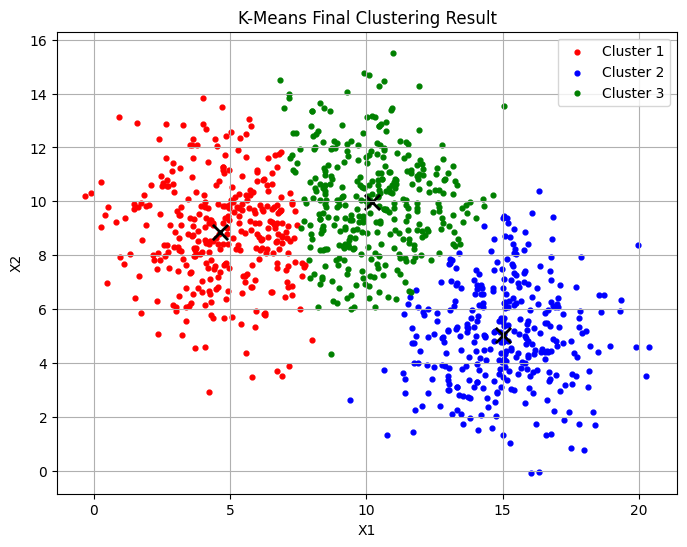

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn import datasets
import numpy as np

# Generate sample data
n_samples = 1000
noisy_circles = datasets.make_blobs(n_samples=n_samples, centers=[[5,9], [10, 10], [15, 5]], cluster_std=2, random_state=0)
X, _ = noisy_circles
points = [Point(x) for x in X]

# Run k-means and capture frames
clusters, frames = kmeans(points, k=3)

# Colors for clusters
colors = ['r', 'b', 'g']

# Create the plot
plt.figure(figsize=(8, 6))

for i, cluster in enumerate(clusters):
    cluster_points = np.array([p.coords for p in cluster.points])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                s=12, c=colors[i], label=f'Cluster {i+1}')
    
    # 聚类中心（centroid 是 numpy 数组）
    centroid = cluster.centroid
    plt.scatter(centroid[0], centroid[1], marker='x', s=120,
                c='black', linewidths=2)

plt.title('K-Means Final Clustering Result')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

# def update(iteration):
#     frame = frames[iteration]
#     ax.clear()
#     for i, cluster in enumerate(frame):
#         cluster_points = np.array([p.coords for p in cluster.points])
#         ax.scatter(cluster_points[:, 0], cluster_points[:, 1], s=12, c=np.repeat(colors[i], len(cluster_points)))
#         centroid = np.array(cluster.centroid.coords)
#         ax.scatter(centroid[0], centroid[1], marker='x', s=60, c='black')
#     # print the sum of distances for each cluster
#     ax.text(0.4, 0.95, f'Loss at iteration {iteration} : {sum([cluster.total_distance() for cluster in frame]):.1f}',
#             horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
#     ax.set_title('K-Means Clustering')

# plt.close()
# 
# # Create animation
# anim = animation.FuncAnimation(fig, update, frames=len(frames), repeat=True, interval=600)
# 
# from IPython import display
# video = anim.to_html5_video()
# html = display.HTML(video)
# display.display(html)

##  Carrés latins ★★★★★

Indicium signifie "trace" en latin. Dans ce problème, nous travaillons avec des carrés latins et des traces de matrices.

Un carré latin est une matrice carrée de taille N par N dans laquelle chaque cellule contient l'une des N valeurs différentes, de sorte qu'aucune valeur ne se répète dans une ligne ou une colonne. Dans ce problème, nous ne nous intéressons qu'aux carrés latins naturels, dans lesquels les N valeurs sont les entiers compris entre 1 et N.

La trace d'une matrice carrée est la somme des valeurs situées sur la diagonale principale (qui va du coin supérieur gauche au coin inférieur droit).

Étant donnés les valeurs N et K, produisez un carré latin naturel de taille N par N avec une trace de K, ou indiquez que c'est impossible.

### Contraintes:
- On la limite suivante $N <= K <= N²$.

### Exemples:
- Pour N=3 et K=6, on a solution possible suivante :
    ```
    [[1, 2, 3],
     [2, 3, 1],
     [3, 1, 2]]
    ```

- Pour N=2 et K=3, il n'y a pas de solution possible.





In [ ]:
def carre_latin(n, k):
    pass